In [1]:
# show the power law distribution of SCI
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("data/sci.csv")
df.head()

df['C'] = np.arange(len(df))
df['SCI_log10'] = np.log10(df['scaled_sci'])
df

,user_loc,fr_loc,scaled_sci,Migrants_from_fr,C,SCI_log10
0,AE,AE,1318515,..,0,6.120085
1,AE,AG,7764,..,1,3.890086
2,AE,AL,2836,..,2,3.452706
3,AE,AM,4174,..,3,3.620552
4,AE,AO,2954,..,4,3.470410
...,...,...,...,...,...,...
34220,NaN,YT,12385,NaN,34220,4.092896
34221,NaN,ZA,88866,7872,34221,4.948736
34222,NaN,ZM,137582,2806,34222,5.138562
34223,NaN,ZW,326749,13413,34223,5.514214


       index  SCI_log10
0      20829   1.698970
1      20277   1.698970
2      20227   1.770852
3      11579   1.770852
4      28229   1.792392
...      ...        ...
34220  16182   8.971240
34221    186   8.972865
34222  29016   8.977212
34223  10416   8.990113
34224  27528   9.000000

[34225 rows x 2 columns]


Text(0.5, 0, 'Observation')

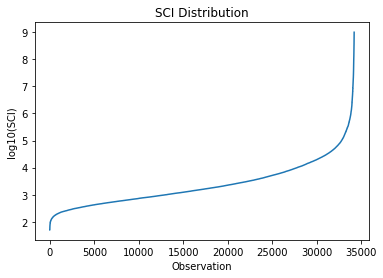

In [2]:
scis = df['SCI_log10'].sort_values().reset_index()
print(scis)
scis.describe()

plt.plot(scis['SCI_log10'])
plt.title("SCI Distribution")
plt.ylabel("log10(SCI)")
plt.xlabel("Observation")

In [3]:
# correlation between GDP and SCI
country_data = pd.read_csv('data/country.csv',encoding='latin-1')
country_data = country_data.astype(str)
sci_data = pd.read_csv('data/sci.csv',encoding='latin-1').astype(str)
gdps = country_data[['alpha-2','gdp']]

# merge GDP and SCI datasets
merged = sci_data.merge(gdps,
                            how='left',
                            left_on='user_loc',
                            right_on = 'alpha-2')
merged = merged.merge(gdps,
                        how='left',
                        left_on='fr_loc',
                        right_on='alpha-2',
                        suffixes=('_user','_fr'))
merged = merged.drop(columns=['alpha-2_user','alpha-2_fr'])
print(merged)

# cleaning data to remove NA values from GDP
merged['gdp_user'] = pd.to_numeric(merged['gdp_user'], errors='coerce')
merged['gdp_fr'] = pd.to_numeric(merged['gdp_fr'], errors='coerce')
merged = merged[merged['gdp_user'].notna()]
merged = merged[merged['gdp_fr'].notna()]
print(merged)

      user_loc fr_loc scaled_sci Migrants_from_fr     gdp_user       gdp_fr
0           AE     AE    1318515               ..  43839.35635  43839.35635
1           AE     AG       7764               ..  43839.35635  16726.98081
2           AE     AL       2836               ..  43839.35635  5284.380184
3           AE     AM       4174               ..  43839.35635  4220.490277
4           AE     AO       2954               ..  43839.35635  3289.646664
...        ...    ...        ...              ...          ...          ...
34220      nan     YT      12385              nan  5495.428836          NaN
34221      nan     ZA      88866             7872  5495.428836  6374.028196
34222      nan     ZM     137582             2806  5495.428836  1556.334482
34223      nan     ZW     326749            13413  5495.428836  1683.740577
34224      nan    nan  115262823               ..  5495.428836  5495.428836

[34225 rows x 6 columns]
      user_loc fr_loc scaled_sci Migrants_from_fr      gdp_use

In [4]:
# add a column for absolute difference of GDP
merged["abs_diff_gdp"] = abs(merged['gdp_user'] - merged['gdp_fr'])

# drop any rows if the absolute difference is 0; this is when a country was compared against itself
merged.drop(merged[merged["abs_diff_gdp"] == 0].index, inplace = True) 
print(merged)

      user_loc fr_loc scaled_sci Migrants_from_fr      gdp_user        gdp_fr  \
1           AE     AG       7764               ..  43839.356350  16726.980810   
2           AE     AL       2836               ..  43839.356350   5284.380184   
3           AE     AM       4174               ..  43839.356350   4220.490277   
4           AE     AO       2954               ..  43839.356350   3289.646664   
5           AE     AR        887               ..  43839.356350  11683.949620   
...        ...    ...        ...              ...           ...           ...   
34217      nan     VU       1711               ..   5495.428836   3095.702156   
34218      nan     WS       1411               ..   5495.428836   4183.408032   
34221      nan     ZA      88866             7872   5495.428836   6374.028196   
34222      nan     ZM     137582             2806   5495.428836   1556.334482   
34223      nan     ZW     326749            13413   5495.428836   1683.740577   

       abs_diff_gdp  
1    

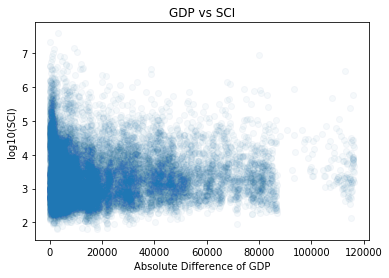

In [5]:
# add a column for the log10(SCI)
merged['scaled_sci'] = pd.to_numeric(merged['scaled_sci'], errors='coerce')
merged['SCI_log10'] = np.log10(merged['scaled_sci'])

plt.scatter(merged['abs_diff_gdp'], merged['SCI_log10'], alpha = 0.02)
plt.xlabel('Absolute Difference of GDP')
plt.ylabel('log10(SCI)')
plt.title('GDP vs SCI')
plt.show()